<a href="https://colab.research.google.com/github/ash-01xor/Exploratory-Data-Analysis/blob/main/statistical_analysis_of_top_hits_in_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **If this EDA helps you , make sure to upvote!**

# **Spotify Top-hits :**

### **Importing Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset
df = pd.read_csv("../input/top-hits-spotify-from-20002019/songs_normalize.csv")
# viewing the first 5 rows of the dataframe
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


#### **Checking the year of release present in the dataset:**

In [ ]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

- we are able to see the fact there are few releases from the years **1998,1999 and 2020** too , considering the fact that the title of the dataset tells **2000-2019**
- Let us check the number of songs from these years present in the dataset

In [ ]:
s1=(len(df.query('year==1998')))
s2=(len(df.query('year==1999')))
s3=(len(df.query('year==2020')))
s= s1+s2+s3
print("The total number of songs:",s)

The total number of songs: 42


- Thus there are 42 songs from all 3 years combined 
- The goal of the dataset is to analyse data from the timeperiod [2000-2019] and hence any other data outside this timeline can be neglected
- Hence we would be removing all the data pertaining to these years from the dataframe

In [ ]:
df_years_drop = df[(df['year'] <2000) | (df['year'] > 2019)].index
df = df.drop(df_years_drop) #removing the rows from dataframe based on the above condition

In [ ]:
df.shape

(1958, 18)

- There are totally 1958 rows and 18 columns present in the dataset

In [ ]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [ ]:
df.dtypes.value_counts()

float64    9
int64      5
object     3
bool       1
dtype: int64

In [ ]:
#to gather shape and size of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1958 non-null   object 
 1   song              1958 non-null   object 
 2   duration_ms       1958 non-null   int64  
 3   explicit          1958 non-null   bool   
 4   year              1958 non-null   int64  
 5   popularity        1958 non-null   int64  
 6   danceability      1958 non-null   float64
 7   energy            1958 non-null   float64
 8   key               1958 non-null   int64  
 9   loudness          1958 non-null   float64
 10  mode              1958 non-null   int64  
 11  speechiness       1958 non-null   float64
 12  acousticness      1958 non-null   float64
 13  instrumentalness  1958 non-null   float64
 14  liveness          1958 non-null   float64
 15  valence           1958 non-null   float64
 16  tempo             1958 non-null   float64


In [ ]:
# gather information regarding data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1958.0,228294.167518,39006.575187,113000.000000,203422.75000,223059.50000,247376.250000,484146.000
year,1958.0,2009.687436,5.715210,2000.000000,2005.00000,2010.00000,2015.000000,2019.000
popularity,1958.0,59.805414,21.511567,0.000000,56.00000,66.00000,73.000000,89.000
danceability,1958.0,0.667258,0.140353,0.129000,0.58100,0.67600,0.763750,0.975
energy,1958.0,0.720057,0.152390,0.054900,0.62400,0.73600,0.837000,0.999
key,1958.0,5.387640,3.610776,0.000000,2.00000,6.00000,8.000000,11.000
loudness,1958.0,-5.502172,1.925689,-20.514000,-6.48100,-5.27950,-4.166250,-0.276
mode,1958.0,0.554137,0.497188,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,1958.0,0.104174,0.096524,0.023200,0.03970,0.06085,0.131000,0.576
acousticness,1958.0,0.128534,0.173719,0.000019,0.01400,0.05530,0.176000,0.976


In [ ]:
#to check the null values in dataset
df.isnull().sum().T

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## **Variable Description:**
* **artist**: Name of the Artist.
* **song**: Name of the Track.
* **duration_ms**: Duration of the track in milliseconds.
* **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* **year**: Release Year of the track.
* **popularity**: The higher the value the more popular the song is.
* **danceability**: Danceability describes how suitable a track is for dancing.
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **loudness**:  Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
* **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
* **speechiness**: Speechiness detects the presence of spoken words in a track. 
* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* **instrumentalness**: Predicts whether a track contains no vocals.
* **liveness**: Detects the presence of an audience in the recording.
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **genre**: Genre of the track.

## **Univariate Variable Analysis:**

### Categorical Variables:

#### Finding the categorical variables in the dataset:

In [ ]:
cv= df.dtypes=='object'
lcv=list(cv[cv].index)
print("Categorical Variables:")
print(lcv)

Categorical Variables:
['artist', 'song', 'genre']


#### **Artist:**

In [ ]:
artist=df['artist'].value_counts()
artist

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: artist, Length: 819, dtype: int64

- There is a total of 835 artists present in the tophits category of spotify

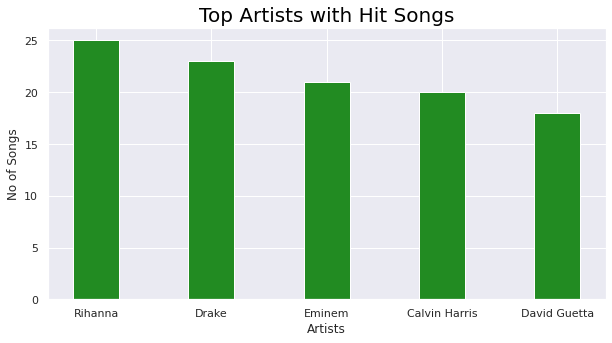

In [ ]:
tp_artists_songs= artist[:5]
tp_artists_name =artist[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_artists_name,tp_artists_songs,width = 0.4,color="forestgreen")
plt.xlabel("Artists")
plt.ylabel("No of Songs")
plt.title('Top Artists with Hit Songs',color = 'black',fontsize = 20)
plt.show()

- Rihanna seems to be the most popular artist with 25 songs of her to be listed as the top-hit in that particular year.
- Immediately followed by Drake who has 23 songs which has been declared as the top-hit over the past 19yrs (2000-2019)

#### **Genre:**

In [ ]:
genre = df['genre'].value_counts()
genre

pop                                      416
hip hop, pop                             275
hip hop, pop, R&B                        240
pop, Dance/Electronic                    219
pop, R&B                                 173
hip hop                                  121
hip hop, pop, Dance/Electronic            78
rock                                      57
rock, pop                                 41
Dance/Electronic                          40
rock, metal                               37
pop, rock                                 26
pop, latin                                26
set()                                     21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
pop, rock, metal                          12
country                                   10
hip hop, pop, rock                         9
metal     

**Plot of the various kinds of genres represented in top hits**

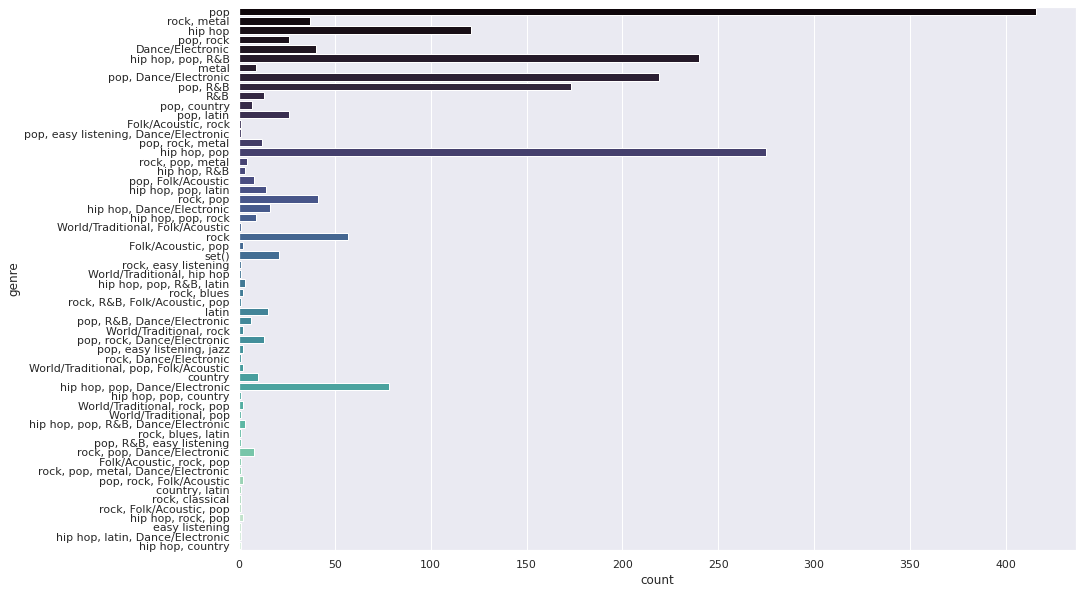

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='genre', data=df,palette="mako")
plt.show()

##### **The most popular genres which gets to be top hits:**

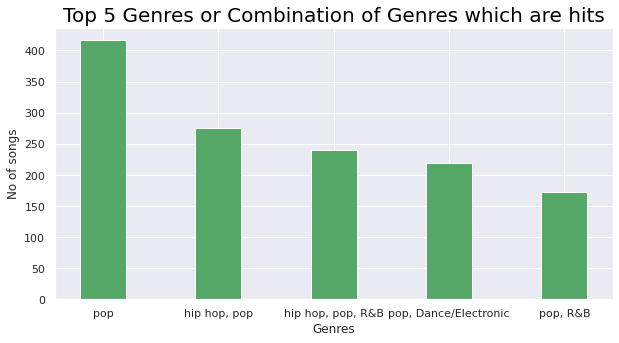

In [ ]:
tp_genres=genre[:5]
tp_genres_names=genre[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_genres_names,tp_genres,width = 0.4,color='g')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres or Combination of Genres which are hits',color = 'black',fontsize = 20)
plt.show()

- Pop seems to be the most popular type of genre 
- 428 songs of the top-hits spotify songs since 2000-2019 belong to pop
- This is followed by hip-hop,pop which is the 2nd most popular conbination of genre

### Numerical Variables:
#### Finding out the numerical variables present in the dataset

In [ ]:
nv= df.dtypes!='object'
lnv=list(nv[nv].index)
print("Numerical Variables:")
print(lnv)

Numerical Variables:
['duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


#### **Average Duration of Top Hit Songs for each year:**

In [ ]:
#converting the duration of songs from milliseconds to minutes for easier understanding
def time_convert(ms):
    sec=ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"
durations = df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[0:20]
durations['min:sec'] = durations['duration_ms'].apply(time_convert)
durations

,year,duration_ms,min:sec
0,2000,249993.067568,4:9
1,2001,242450.064815,4:2
2,2002,253549.077778,4:13
3,2003,236334.639175,3:56
4,2004,234039.843750,3:54
5,2005,236514.288462,3:56
6,2006,238148.400000,3:58
7,2007,231749.904255,3:51
8,2008,235675.247423,3:55
9,2009,236082.059524,3:56


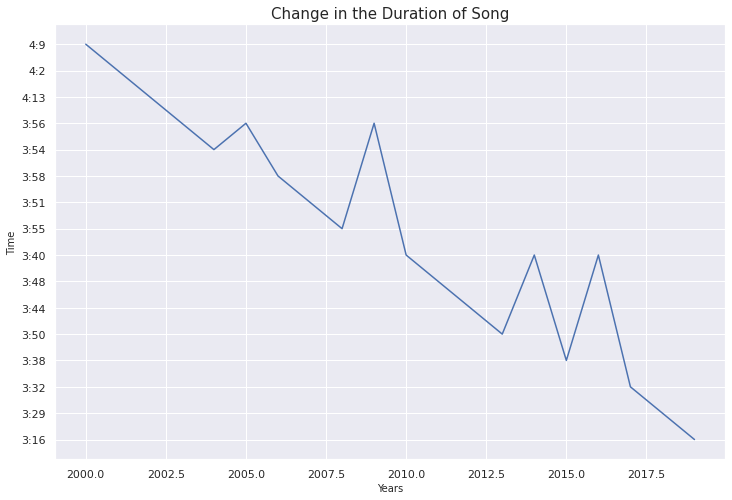

In [ ]:
x=df["year"].unique()
x=sorted(x)
y=(durations["min:sec"])
x=pd.Series(x)
plt.figure(figsize=(12,8))
sns.lineplot(x,y,data=df)
plt.title('Change in the Duration of Song',fontsize=15)
plt.xlabel('Years',size=10)
plt.ylabel('Time',size=10)
plt.show()

- Here we can find the general pattern that as the years pass by the average song duration has been **decreasing**

#### **Longest and Shortest song to be certified a hit:**

In [ ]:
song_len = df[['artist','song','duration_ms','year']]
max_dur = df['duration_ms'].max()
sl_max = song_len[df['duration_ms']==max_dur].T
print("Longest Duration:",sl_max)
print("\n")
min_dur = df['duration_ms'].min()
sl_min = song_len[df['duration_ms']==min_dur].T
print("Shortest Duration:",sl_min)
mean_dur = df['duration_ms'].mean()
print("\nAverage Duration:",time_convert(mean_dur))

Longest Duration:                           1381
artist       Justin Timberlake
song                   Mirrors
duration_ms             484146
year                      2013


Shortest Duration:                       1931
artist           Lil Nas X
song         Old Town Road
duration_ms         113000
year                  2019

Average Duration: 3:48


- The **longest song** to be certifed a top hit is **Mirrors** by **Justin Timberlake from 2013**
- The **shortest son**g to be certified a top hit is **Old Town Road** by **Lil Nas X from 2019**
- The average duration of a top-hit song is **3mins and 48sec**.

#### **Amount of Explicit Content in top-hits:**

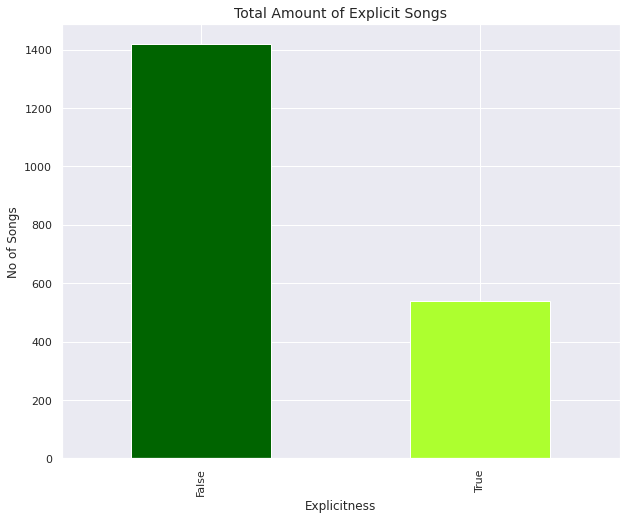

In [ ]:
data=df['explicit'].value_counts()
plt.figure(figsize=(10,8))
plt.title("Total Amount of Explicit Songs",fontsize=14)
plt.ylabel("No of Songs")
plt.xlabel("Explicitness")
data.plot(kind='bar',color=['darkgreen', 'greenyellow'])

plt.show()

**- Thus we can conclude that most of the top-hits have low explicit lyrics**

#### **Number of Top-hits which are explict over the years:**

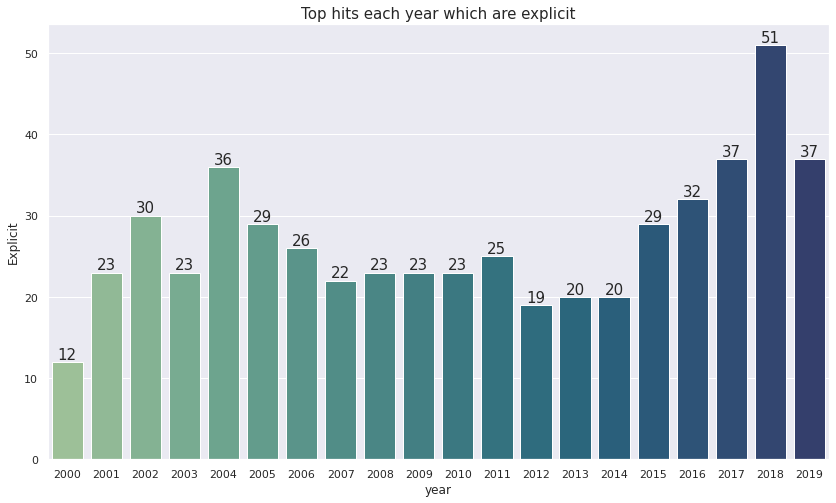

In [ ]:

song_yr_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
song_yr_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)
plt.figure(figsize=(14,8))
plt.title("Top hits each year which are explicit",fontsize=15)
c1 = sns.barplot(x="year",y="Explicit",data=song_yr_explicit,palette="crest")
c1.bar_label(c1.containers[0],size = 15)
plt.show()


#### **Number of songs released each year which became top-hits:**

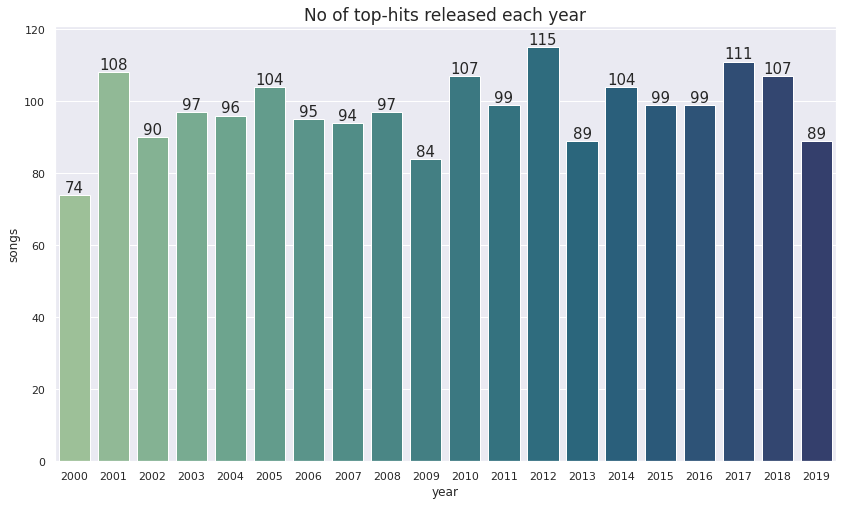

In [ ]:
songs_yr = df.year.value_counts().rename_axis('year').reset_index(name='songs') 
plt.figure(figsize=(14,8))
plt.title("No of top-hits released each year",fontsize=17)
c1 = sns.barplot(x="year",y="songs",data=songs_yr,palette="crest")
c1.bar_label(c1.containers[0],size = 15)
plt.show()


-  Analying the the top-hits from 1999 to 2019 we can see , **2012** had the **maximum number** of songs to make it to the top-hits, while the **lowest** was in **2000**

#### **The most popular song to ever become top-hit:**
- The popularity of a song on Spotify is based on the **popularity score which ranges from 0-100** , with 100 being the maximum

In [ ]:
max_pop= df.loc[df['popularity']== df['popularity'].max()]
max_pop

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


#### **The most popular artists:**

In [ ]:
pop_artist = df.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',ascending=False).head(10)
pop_artist

,popularity
artist,
Rihanna,1803
Eminem,1519
Drake,1424
Calvin Harris,1356
David Guetta,1185
Britney Spears,1140
Taylor Swift,1125
Chris Brown,1080
Kanye West,1049


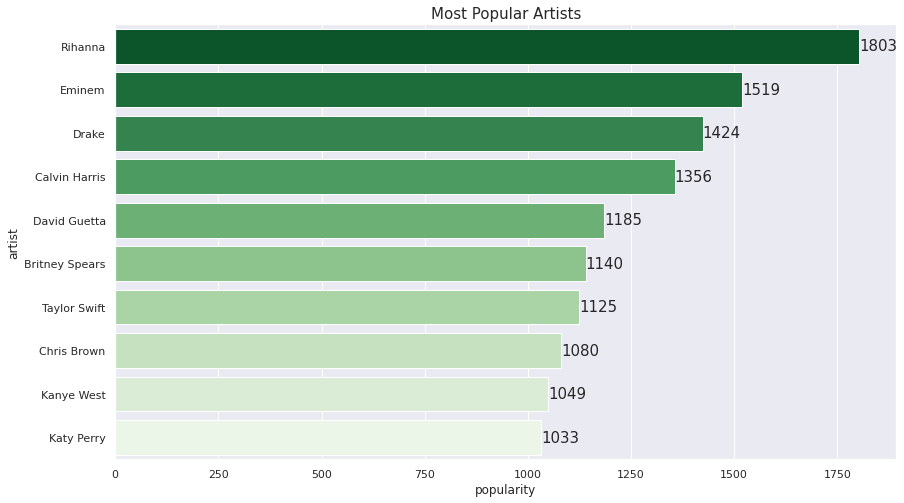

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Most Popular Artists",fontsize=15)
c1 = sns.barplot(x="popularity",y=pop_artist.index,data=pop_artist,palette="Greens_r")
c1.bar_label(c1.containers[0],size = 15)
plt.show()

- **Rihanna** seems to be the most popular artist to have been featured in a top hit followed by **Eminem**.

#### **The most Danceable song to be a top-hit:**

In [ ]:
max_dance = df.loc[df['danceability']==df['danceability'].max()]
max_dance

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
714,Timbaland,Give It To Me,234026,True,2007,70,0.975,0.711,8,-3.904,1,0.0632,0.168,0.000552,0.0799,0.815,110.621,"hip hop, pop, R&B"


#### **The Least Danceable song to be a top-hit:**

In [ ]:
min_dance = df.loc[df['danceability']==df['danceability'].min()]
min_dance

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
573,Westlife,You Raise Me Up,241066,False,2005,1,0.129,0.358,10,-6.596,1,0.0314,0.631,0.0,0.0886,0.172,75.048,pop


## **Multivariate Variable Analysis:**

### **Key and Mode:**
- **Key**:The key the track is in. Integers map to pitches using standard Pitch Class notation.
- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

In [ ]:
key_mode = df.groupby(['key','mode']).size().unstack(fill_value = 0).reset_index()
key_mode.rename(columns = {0: 'minor', 1: 'major'}, inplace = True)
key_mode.key.replace({0:'C',1:'C♯/D♭',2:'D',3:'E♭/D♯',4:'E',5:'F',6:'F♯/G♭',7:'G',8:'A♭/G♯',9:'A',10:'B♭/A♯',11:'B'}, inplace=True)
key_mode

mode,key,minor,major
0,C,65,128
1,C♯/D♭,91,168
2,D,32,123
3,E♭/D♯,31,27
4,E,76,48
5,F,111,67
6,F♯/G♭,79,73
7,G,56,139
8,A♭/G♯,57,112
9,A,71,84


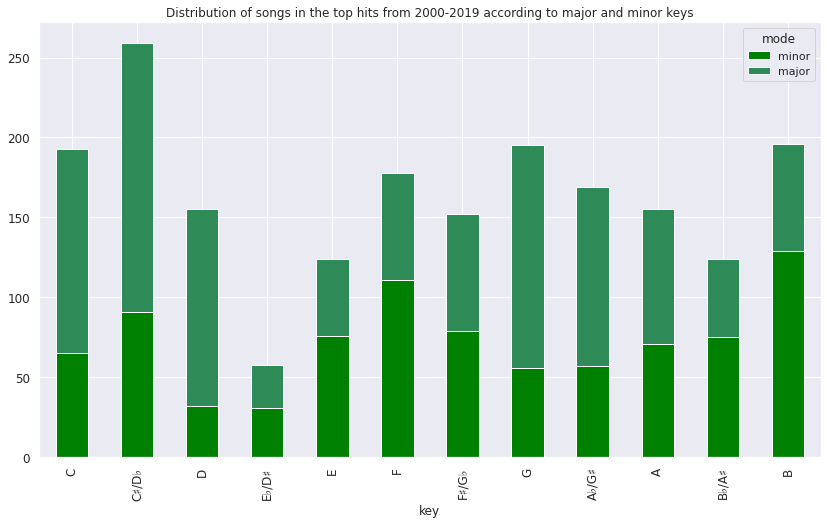

In [ ]:
key_mode.plot.bar(x='key',stacked=True,color=['green','seagreen'],
              title="Distribution of songs in the top hits from 2000-2019 according to major and minor keys",
              figsize=(14,8),fontsize=12)
plt.show()

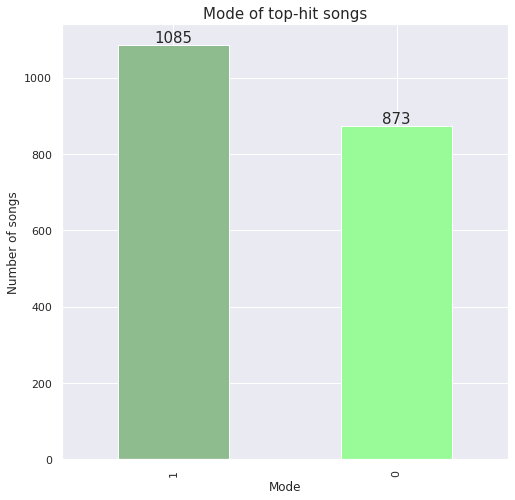

In [ ]:
data=df['mode'].value_counts()
plt.figure(figsize=(8,8))
plt.title("Mode of top-hit songs",fontsize=15)
plt.ylabel("Number of songs")
plt.xlabel("Mode")
c1=data.plot(kind='bar',color=['darkseagreen', 'palegreen'])
c1.bar_label(c1.containers[0],size = 15)
plt.show()

- Thus we can conclude from the given analysis that **C♯/D♭** is key for majority of the top-hits between the period 2000-2019 and most of the top-hits are on **major scale**

#### **Popular songs which are explicit:**

Explicit Is True = 540
Explicit Is False = 1418


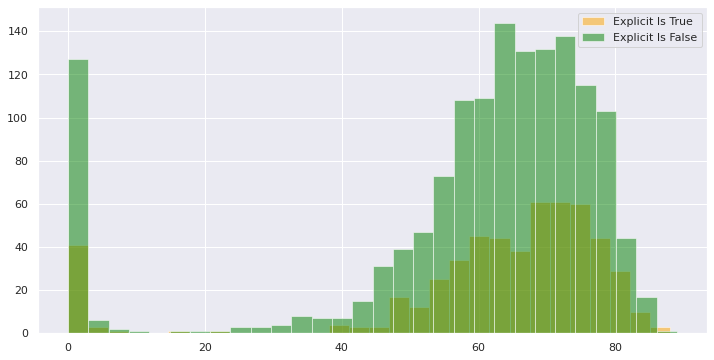

In [ ]:
print ('Explicit Is True =',(df[df['explicit']==True]['popularity']).count())
print ('Explicit Is False =',(df[df['explicit']==False]['popularity']).count())
plt.figure(figsize=(12,6))
df[df['explicit']==True]['popularity'].hist(bins=30, color='orange',alpha=0.5,
                                                        label='Explicit Is True')
df[df['explicit']==False]['popularity'].hist(bins=30, color='green',alpha=0.5,
                                                        label='Explicit Is False')
plt.legend()

**- Thus we can conclude that most of the top-hits which are popular have low explicit lyrics**

## **To find the relationship between the features:**

### **Correlation between various features:**

In [ ]:
#creating a new dataframe to find the relation among numerical variables present in the dataset
df_new = df[['duration_ms', 'year', 'popularity', 'danceability', 'energy', 
     'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

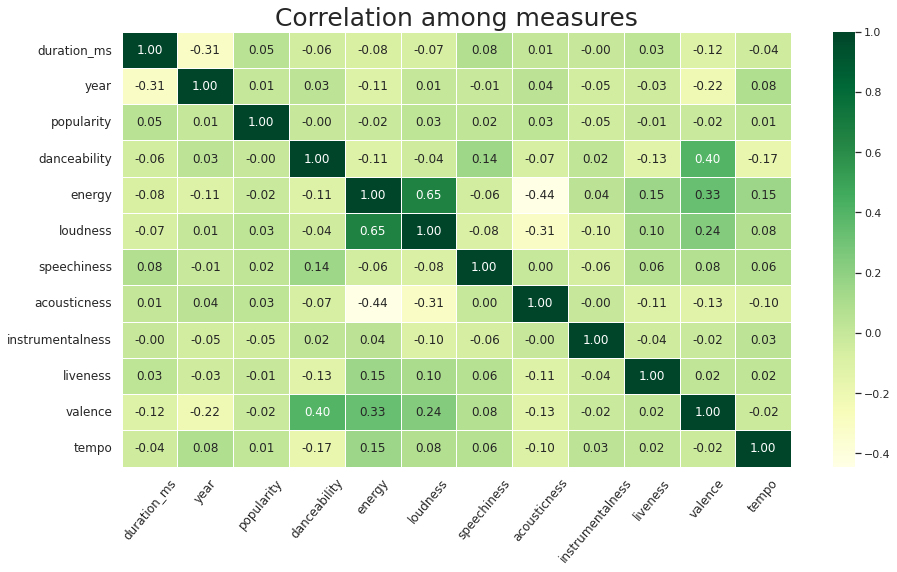

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), annot = True, linewidths = .5, fmt = '.2f',cmap = "YlGn")
plt.title('Correlation among measures', size = 25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
plt.show()

- We are able to understand from the above heatmap that there are both **positive** and **negative** correlation among features.
- Higher the energy of the song , louder it is.
- Songs which have high danceability scores are positively correlated with quite high valence scores.

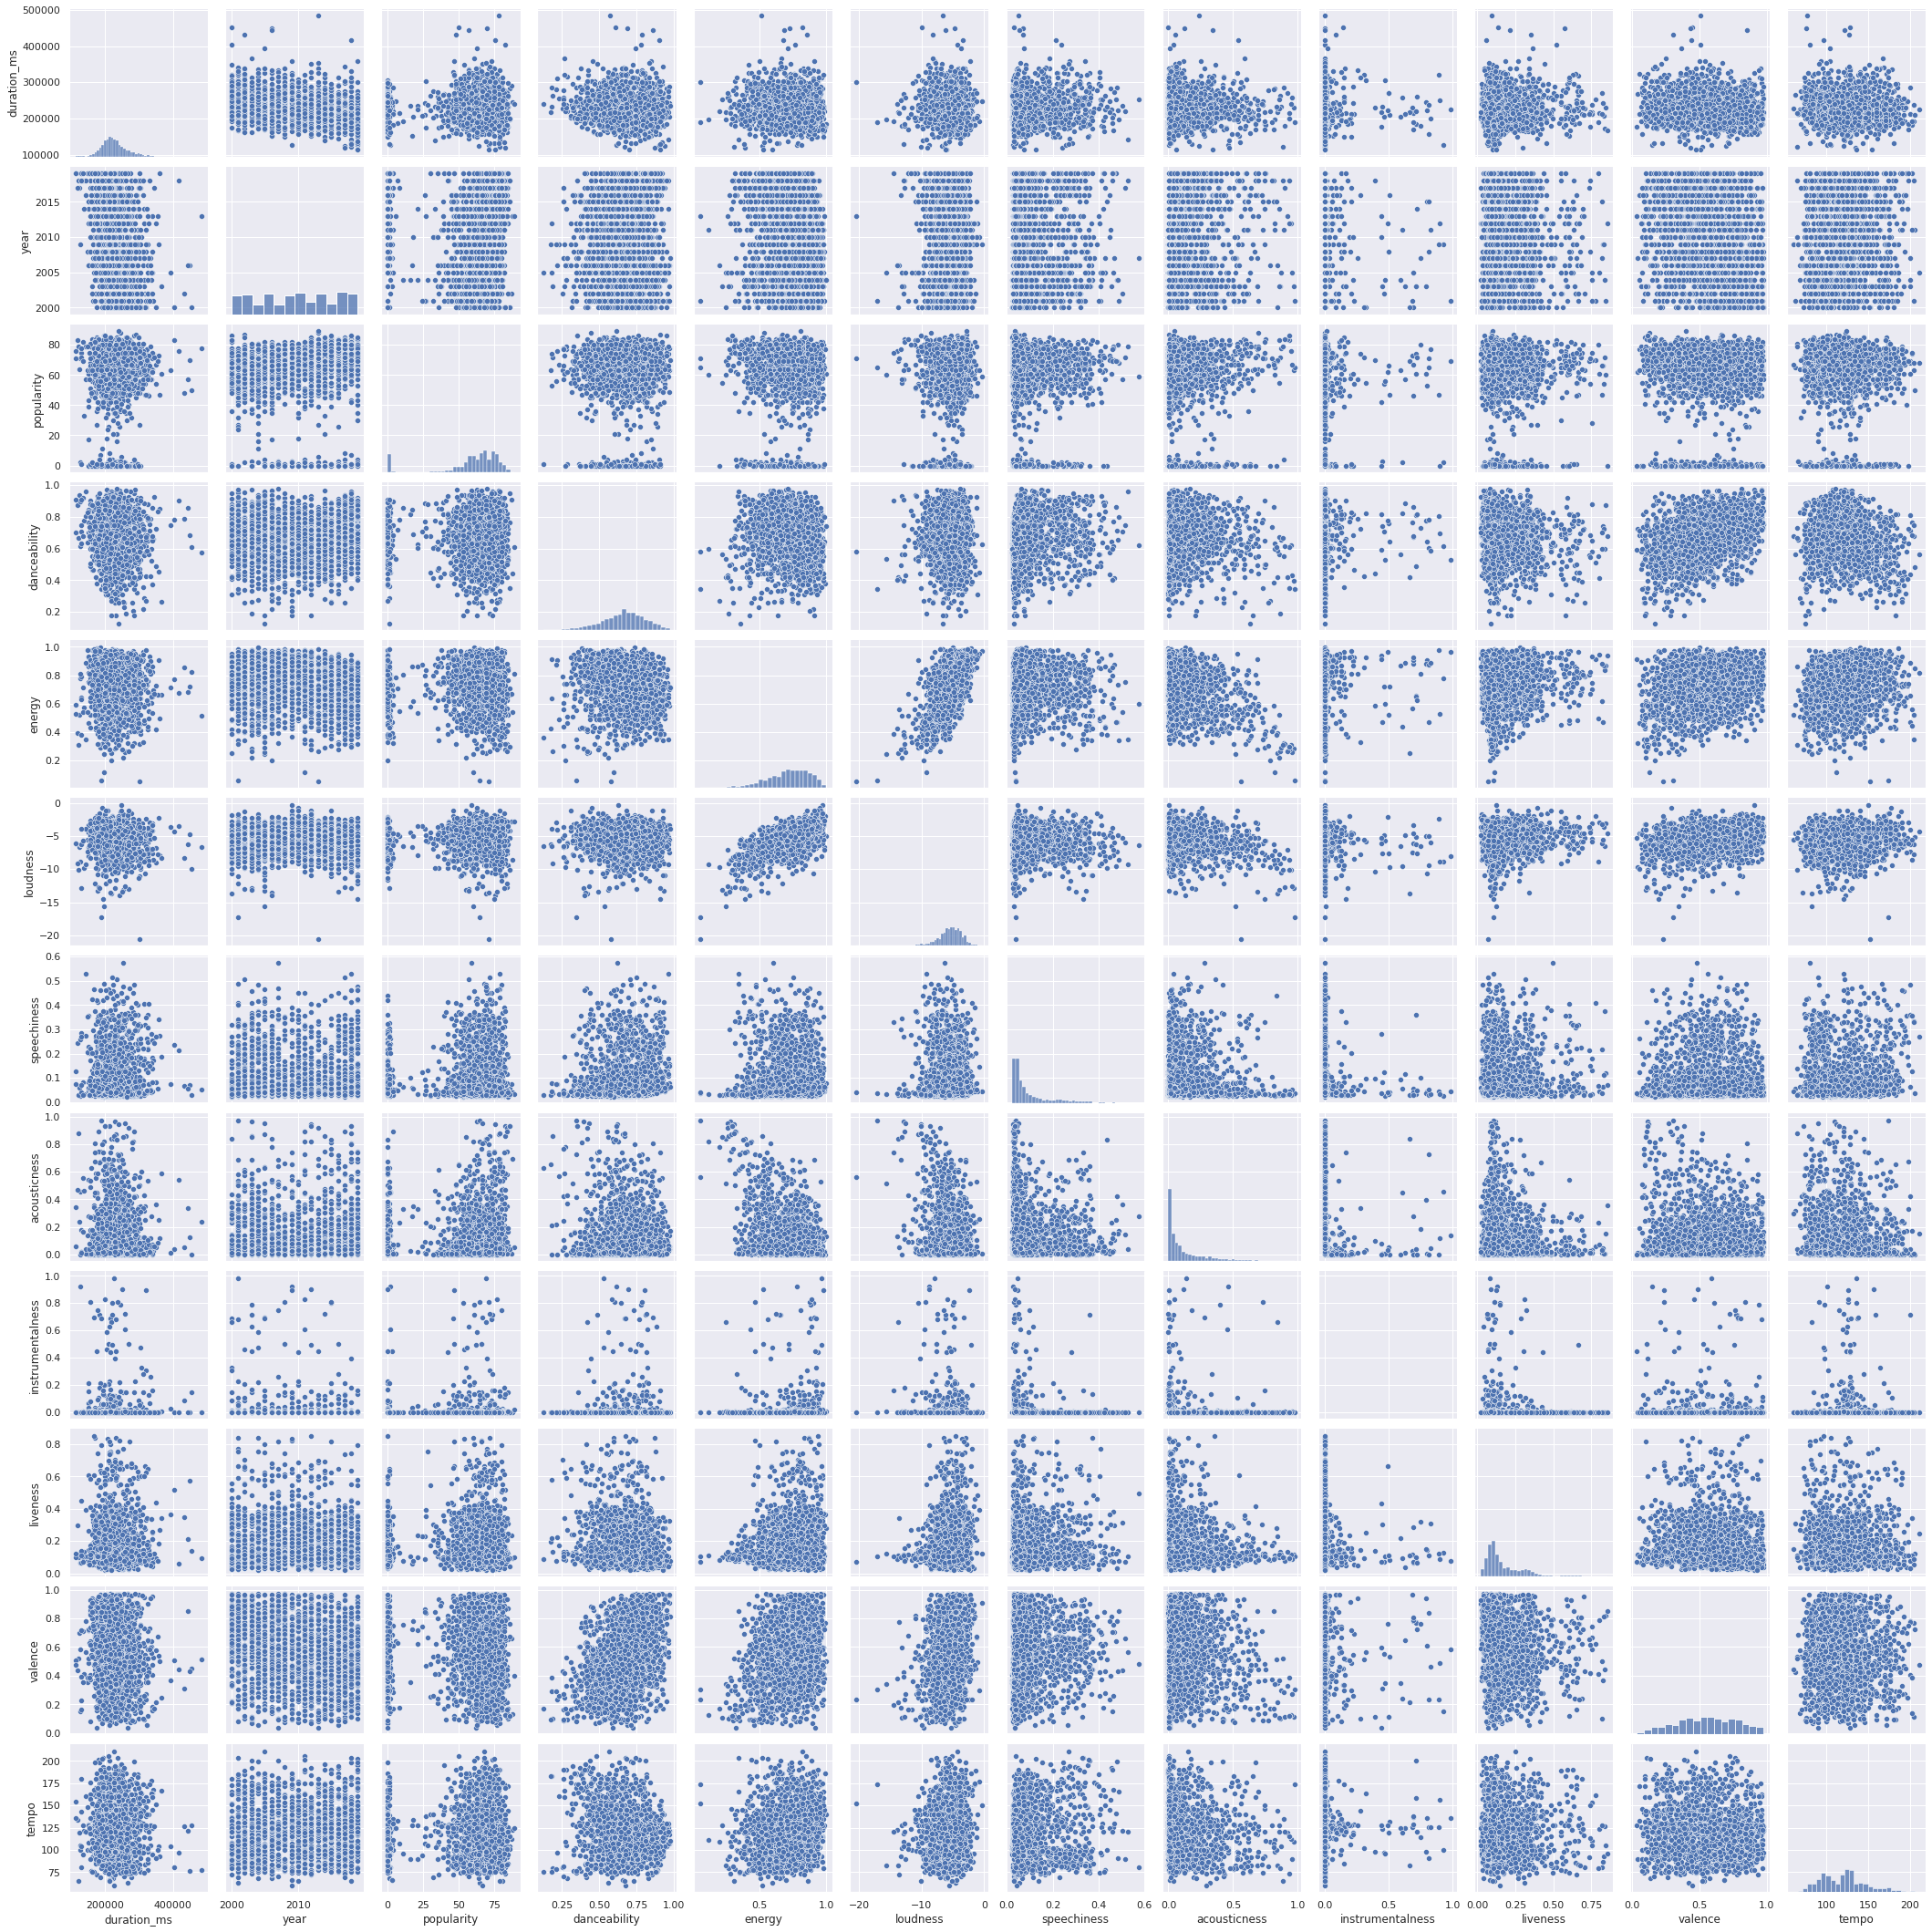

In [ ]:
sns.pairplot(df_new)

### **Distributions of Top-hits on basis of various features from 2000-2019:**

#### **Popularity:**

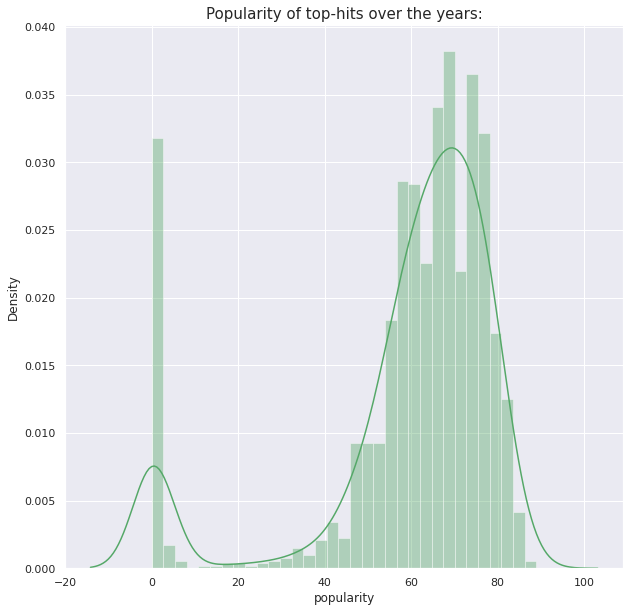

Average Popularity of top-hits: 59.80541368743616
Maximum Populaitry of top-hits:



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Popularity of top-hits over the years:",size=15)
sns.distplot(df_new['popularity'],color="g")
plt.show()
print("Average Popularity of top-hits:",df_new['popularity'].mean())
print("Maximum Populaitry of top-hits:\n")
df.loc[df['popularity']==df['popularity'].max()]

#### **Danceability:**

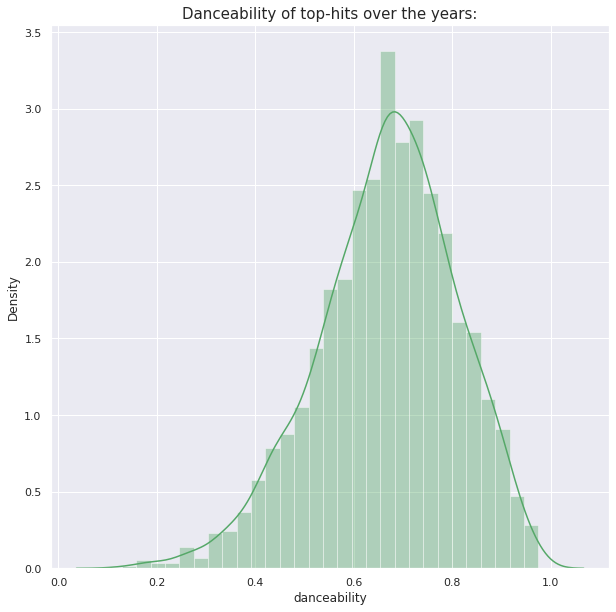

Average danceability of top-hits:
 0.6672579162410623
Maximum danceability of top-hits:



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
714,Timbaland,Give It To Me,234026,True,2007,70,0.975,0.711,8,-3.904,1,0.0632,0.168,0.000552,0.0799,0.815,110.621,"hip hop, pop, R&B"


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Danceability of top-hits over the years:",size=15)
sns.distplot(df_new['danceability'],color="g")
plt.show()
print("Average danceability of top-hits:\n",df['danceability'].mean())
print("Maximum danceability of top-hits:\n")
df.loc[df['danceability']==df['danceability'].max()]

#### **Energy:**

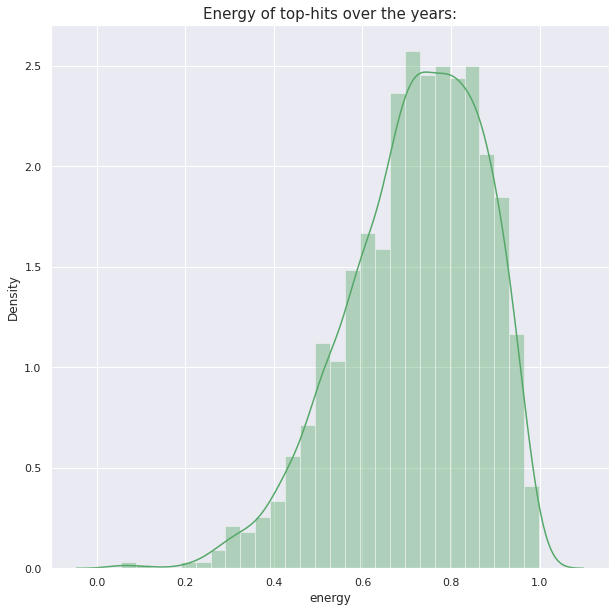

Average energy of top-hits:
 0.6672579162410623
Maximum energy of top-hits:



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
477,Special D.,Come With Me - Radio Edit,185133,False,2004,61,0.739,0.999,7,-5.077,1,0.0803,0.13,0.00224,0.28,0.501,139.982,pop


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Energy of top-hits over the years:",size=15)
sns.distplot(df_new['energy'],color="g")
plt.show()
print("Average energy of top-hits:\n",df['danceability'].mean())
print("Maximum energy of top-hits:\n")
df.loc[df['energy']==df['energy'].max()]

#### **Loudness:**

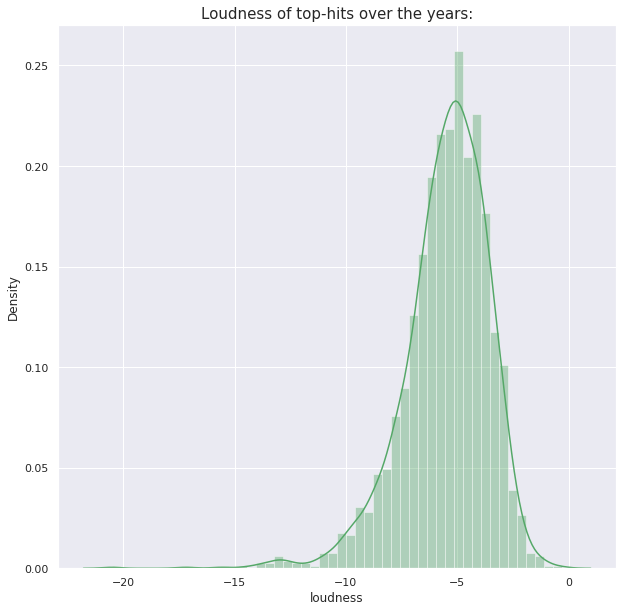

Average Loudness of top-hits:
 -5.502172114402452
Maximum Loudness of top-hits:



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
971,La Roux,In For The Kill,248626,False,2009,59,0.629,0.969,8,-0.276,0,0.0455,0.00184,0.0,0.122,0.905,150.01,"pop, Dance/Electronic"


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Loudness of top-hits over the years:",size=15)
sns.distplot(df_new['loudness'],color="g")
plt.show()
print("Average Loudness of top-hits:\n",df['loudness'].mean())
print("Maximum Loudness of top-hits:\n")
df.loc[df['loudness']==df['loudness'].max()]

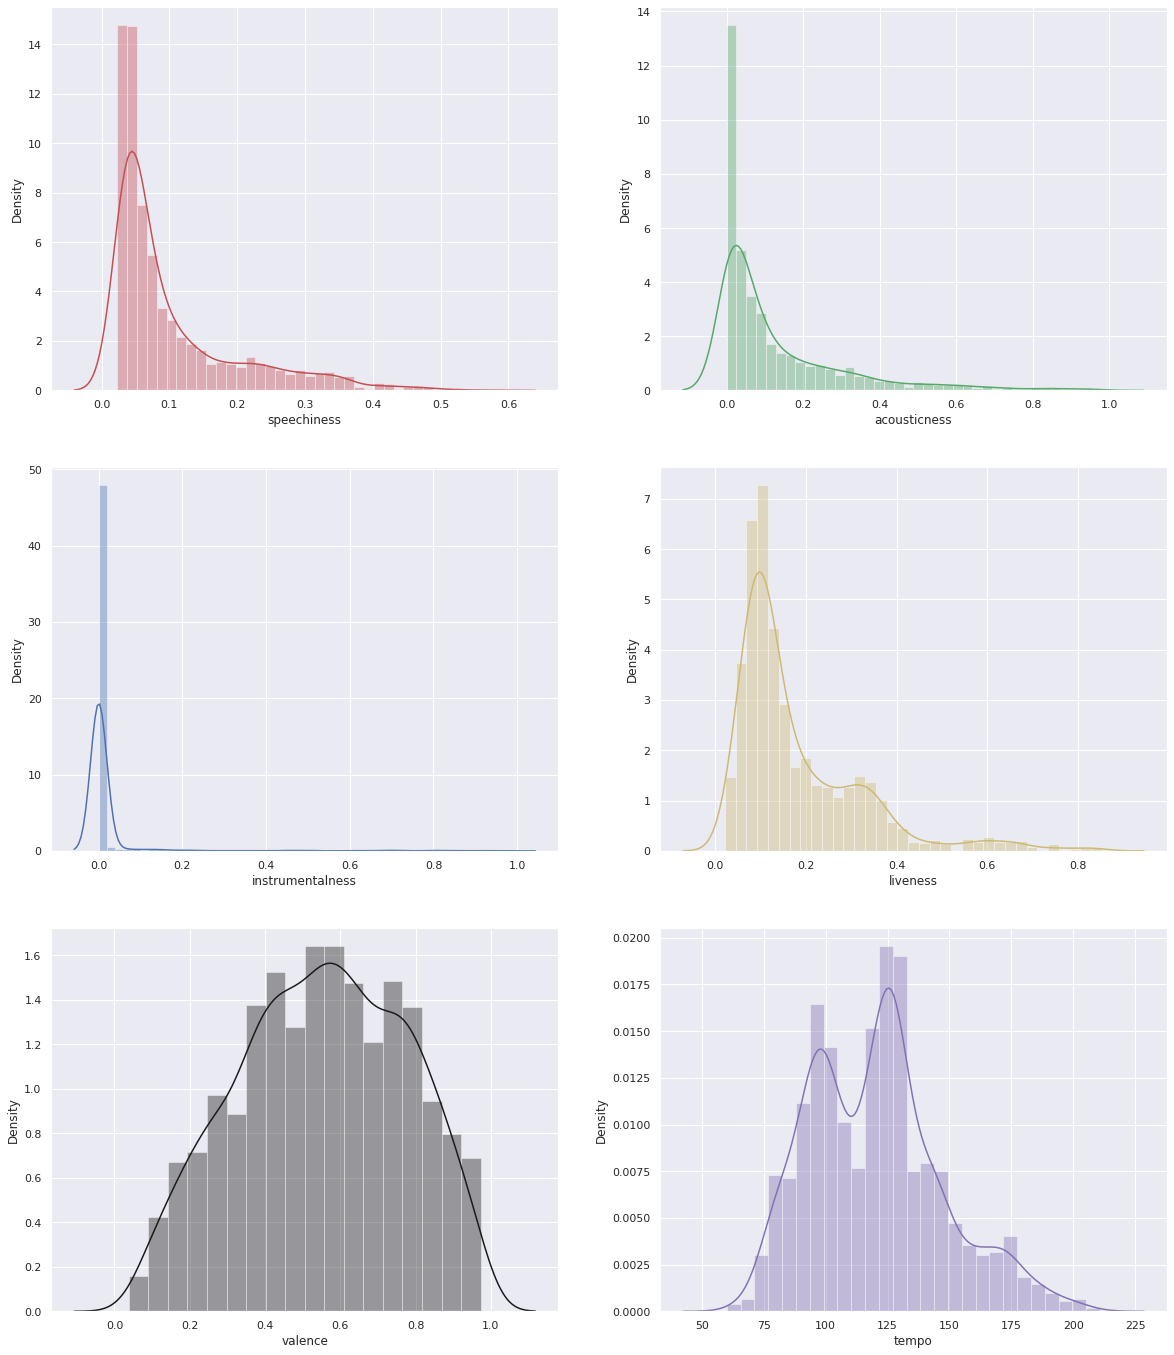

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,24))
Speechiness= df_new['speechiness'].dropna()
sns.distplot(Speechiness,color='r',ax=ax[0][0])

Acousticness= df_new['acousticness'].dropna()
sns.distplot(Acousticness,color='g',ax=ax[0][1])

Instrumentalness = df_new['instrumentalness'].dropna()
sns.distplot(Instrumentalness,color='b',ax=ax[1][0])

Liveness= df_new['liveness'].dropna()
sns.distplot(Liveness,color='y',ax=ax[1][1])

Valence= df_new['valence'].dropna()
sns.distplot(Valence,color='k',ax=ax[2][0])

tempo= df_new['tempo'].dropna()
sns.distplot(tempo,color='m',ax=ax[2][1])


plt.show()

#### **The mean values for the above features are:**

In [ ]:
data1={'heading':['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
       'data':[df_new['speechiness'].mean(),df_new['acousticness'].mean(),df_new['instrumentalness'].mean(),
      df_new['liveness'].mean(),df_new['valence'].mean(),df_new['tempo'].mean()]}

df2 = pd.DataFrame(data1)
df2 

,heading,data
0,Speechiness,0.104174
1,Acousticness,0.128534
2,Instrumentalness,0.015371
3,Liveness,0.181406
4,Valence,0.551287
5,Tempo,120.080067


- From the above analysis we can suggest that:
    *    The danceability and energy on average for the top-hits are generally high , indicating that these songs are high on intensity.<br>
    *    The loudness of the top-hits are also high compared to the rest of the songs.<br>
    *    Speechiness of top-hits are quite low.
    *    Instrumentalness of songs are also low , which gives a pretty clear idea as to how music-taste has evolved among listeners. The late 20th century was   dominated by the bands as the years progressed we got to witness a decline in the number of bands being popular and thus instrumentalness also declined over the years expect few.
    *    Acousticness of tracks are also low , suggesting that songs which tend to become top-hits are high in energy and tempo.
    *    Songs which become top-hits score low on liveness indicating the songs are mostly recorded.
    *    Top-hits on average score just above 0.5 on valence indicating that while most top-hits have a positive mood associated with them , still top-hits have quite a equal mixture of both positive and sad sounding associated with them.
    *  Last but not the least the tempo for most of the top-hits on average is 120bpm suggesting that songs which are peppy and fast sounding.   

# **Conclusion:**

### **From the above analysis we can infer the following:**
-   The **duration of top-hits** have been **decreasing** with each passing year. The average song duration is 3 min and 48 sec long.
-   Songs which tend to become top-hits have **low explicity**.
-   **Rihanna** , **Emimem** , **Drake** , **Calvin Harris** , **David Guetta** are the most popular artists.
-   Top-hits generally had
    -  **high danceability levels** ,
    -  **fast paced tempo** 
    -  **low acousticness** 
    -  **instrumentalness** and were generally **recorded**.
-   Songs which tend to be top-hits over this period mostly belonged to the genre **'Pop'**.
-   **C♯/D♭** is **key** for majority of the top-hits in this period and most of the top-hits are on **major scale**.

**Well that's it we have come to an end.**

**Once again make sure you upvote if you find this useful! :)**